In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
class MyLogisticRegression:

    def __init__(self, lr, epochs):

        self.lr = lr
        self.epochs = epochs
        self.weights = None

    def sigmoid(self,z):

        return 1/(1+np.exp(-z))

    def fit(self, X, y):

        m, n = X.shape
        X = np.insert(X, 0, 1, axis=1)
        self.weights = np.ones(X.shape[1])

        for i in range(self.epochs):
            z = np.dot(X, self.weights)
            y_hat = self.sigmoid(z)
            self.weights = self.weights + self.lr * (np.dot((y - y_hat), X) / m)
        return self.weights[1:], self.weights[0]

    def predict_proba(self, X):
        m = X.shape[0]
        X = np.insert(X, 0, 1, axis=1)
        z = np.dot(X, self.weights)
        return self.sigmoid(z)
        
    def predict(self, X):
        probs = self.predict_proba(X)
        return np.where(probs >= 0.5, 1, 0)

In [3]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1,
                          random_state=41, hypercube=False, class_sep=10)

In [4]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(X,y)

C:\Users\Atharva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


In [5]:
print(lor.coef_)
print(lor.intercept_)

[[13.52305761  0.99365501]]
[8.96624783]


In [6]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [7]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

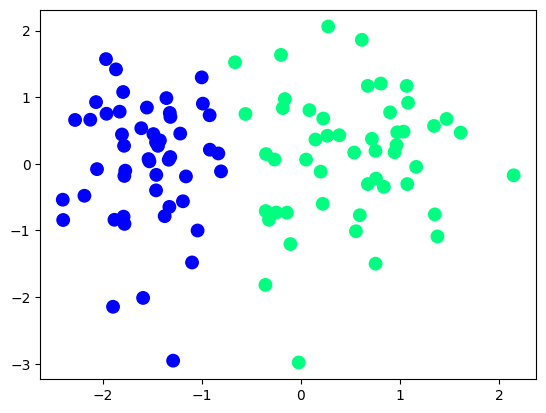

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=80)

In [9]:
lr = MyLogisticRegression(0.5, 5000)

In [10]:
coef_, intercept_ = lr.fit(X,y)

In [11]:
m = -(coef_[0] / coef_[1])
b = -(intercept_/ coef_[1])

In [12]:
xinp = np.linspace(-3, 3, 100)
yinp = m*xinp + b

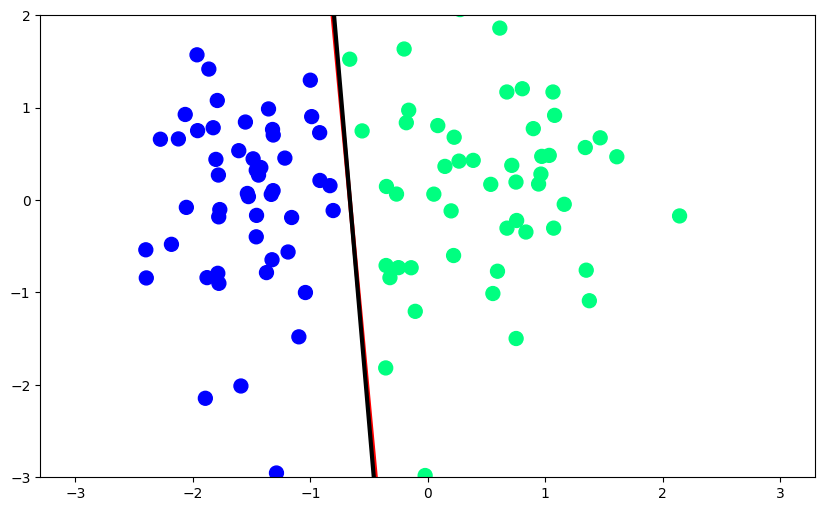

In [13]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3) # sklearn
plt.plot(xinp,yinp,color='black',linewidth=3) # my own model
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.show()

<Axes: >

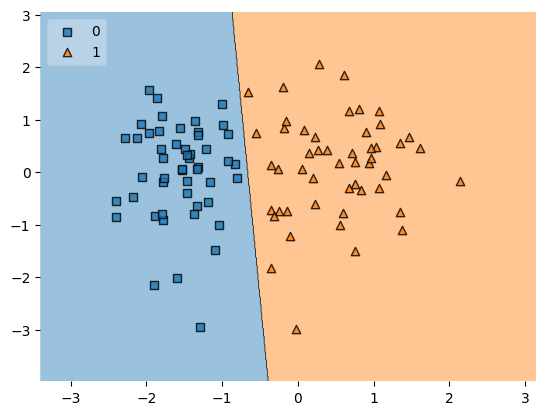

In [14]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, lr, legend=2)